In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [ ]:
# Custom wrapper function for model
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)

In [ ]:
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)

In [ ]:
input_size = n_features
output_size = 1
model = LinearRegression(input_size, output_size)

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training Loop
for epoch in range(n_iters):
    # Predictions
    y_pred = model(X)
    
    # loss
    l = loss(y_pred, Y)
    
    # gradients dl/dw
    l.backward()
    
    # update weights
    optimizer.step()
    
    # zero the gradient
    optimizer.zero_grad()
    
    if epoch%10==0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5) = {model(X_test).item()}')

### Custom Dataset

In [5]:
x_numpy, y_numpy = datasets.make_regression(100, 1, noise=20, random_state=1)

X = torch.from_numpy(x_numpy.astype(np.float32))
Y = torch.from_numpy(y_numpy.astype(np.float32))

Y = Y.view(Y.shape[0], 1)

n_samples, n_features = X.shape

input_size = n_features
output_size = 1

# Model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training Loop
num_epochs = 200
for epoch in range(num_epochs):
    # Forwards pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, Y)
    
    # Backward Pass
    loss.backward()
    
    # Optimizer
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {loss.item():.8f}')

epoch 10: w = 12.375, loss = 4353.37988281
epoch 20: w = 22.682, loss = 3249.25146484
epoch 30: w = 31.465, loss = 2450.17456055
epoch 40: w = 38.952, loss = 1871.26159668
epoch 50: w = 45.334, loss = 1451.44433594
epoch 60: w = 50.776, loss = 1146.72607422
epoch 70: w = 55.418, loss = 925.36773682
epoch 80: w = 59.377, loss = 764.44219971
epoch 90: w = 62.754, loss = 647.36840820
epoch 100: w = 65.636, loss = 562.14202881
epoch 110: w = 68.095, loss = 500.06274414
epoch 120: w = 70.194, loss = 454.81939697
epoch 130: w = 71.986, loss = 421.82989502
epoch 140: w = 73.515, loss = 397.76440430
epoch 150: w = 74.821, loss = 380.20153809
epoch 160: w = 75.936, loss = 367.37945557
epoch 170: w = 76.889, loss = 358.01519775
epoch 180: w = 77.702, loss = 351.17425537
epoch 190: w = 78.397, loss = 346.17507935
epoch 200: w = 78.991, loss = 342.52102661


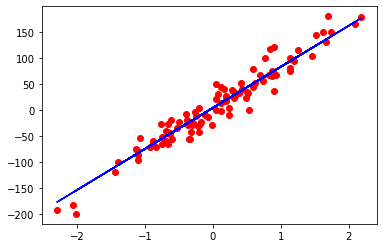

In [6]:
predicted = model(X).detach().numpy()

plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')